In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 生成数据
n_train, n_test, n_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones([n_inputs, 1], dtype=torch.float) * 0.01, 0.05

features = torch.randn([n_train + n_test, n_inputs], dtype=torch.float)
labels = torch.mm(features, true_w) + true_b

train_data = Data.TensorDataset(features[:n_train, :], labels[:n_train, :])
test_data = Data.TensorDataset(features[n_train:n_train + n_test, :], labels[n_train:n_train + n_test, :])
train_iter = Data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_iter = Data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [9]:
# 定义模型
class LinearNet(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_inputs, n_outputs)
        self._init_params()
    
    def _init_params(self):
        nn.init.normal_(self.linear.weight, mean=0, std=1)
        nn.init.constant_(self.linear.bias, val=0)
    
    def forward(self, x):
        return self.linear(x)

In [21]:
# 损失计算函数
def evaluate_loss(net, data_iter, loss):
    loss_sum = 0.0
    
    for x, y in data_iter:
        y_hat = net(x)
        l = loss(y_hat, y.view(y_hat.shape)).mean()
        loss_sum += l.item()
    
    return loss_sum / len(data_iter)

In [28]:
# 训练模型函数
def train(l2_lambda, lr):
    net = LinearNet(n_inputs, n_outputs)
    
    loss = nn.MSELoss(reduction='none')
    
    params = [
        {'params': net.linear.weight, 'weight_decay': l2_lambda}, 
        {'params': net.linear.bias}
    ]
    optimizer = optim.SGD(params, lr = lr)
    
    n_epochs = 100
    
    train_losses, test_losses = [], []
    
    for epoch in range(n_epochs):
        for x, y in train_iter:
            y_hat = net(x)
            l = loss(y_hat, y.view(y_hat.shape)).mean()
            
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        
        train_loss = evaluate_loss(net, train_iter, loss)
        test_loss = evaluate_loss(net, test_iter, loss)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        if(epoch == 0 or (epoch + 1) % 10 == 0):
            print(f'epoch {epoch + 1: d}, train loss {train_loss: .6f}, test loss {test_loss: .6f}')
    
    fig, ax = plt.subplots(figsize=[5, 2.5])
    ax.set_yscale('log')
    ax.grid(True)
    ax.set_xlabel('epochs')
    
    ax.plot(range(1, n_epochs + 1), train_losses, label = 'train loss', color='blue', linestyle='--')
    ax.plot(range(1, n_epochs + 1), test_losses, label = 'test loss', color='purple', linestyle='-.')
    
    plt.legend()
    plt.show()

epoch  1, train loss  145.065246, test loss  193.433365
epoch  10, train loss  1.895658, test loss  185.029244
epoch  20, train loss  0.056456, test loss  184.662811
epoch  30, train loss  0.002561, test loss  184.603770
epoch  40, train loss  0.000130, test loss  184.585058
epoch  50, train loss  0.000007, test loss  184.579812
epoch  60, train loss  0.000000, test loss  184.578385
epoch  70, train loss  0.000000, test loss  184.578040
epoch  80, train loss  0.000000, test loss  184.577954
epoch  90, train loss  0.000000, test loss  184.577926
epoch  100, train loss  0.000000, test loss  184.577928


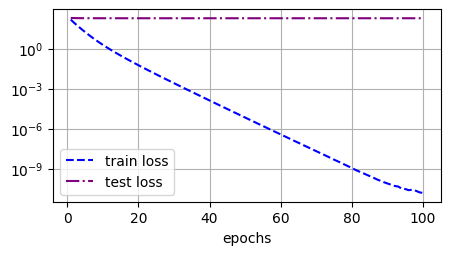

In [29]:
# 不加入权重衰减
train(0.0, 0.003)

epoch  1, train loss  138.889790, test loss  165.287041
epoch  10, train loss  0.455790, test loss  59.374978
epoch  20, train loss  0.003247, test loss  17.932601
epoch  30, train loss  0.001222, test loss  5.383679
epoch  40, train loss  0.001297, test loss  1.628110
epoch  50, train loss  0.001281, test loss  0.504609
epoch  60, train loss  0.001161, test loss  0.167992
epoch  70, train loss  0.001151, test loss  0.066641
epoch  80, train loss  0.001094, test loss  0.035803
epoch  90, train loss  0.001015, test loss  0.026174
epoch  100, train loss  0.000984, test loss  0.022957


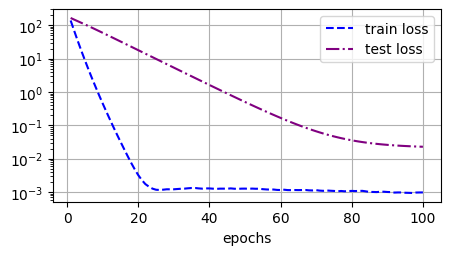

In [34]:
# 加入权重衰减
train(5, 0.003)